755


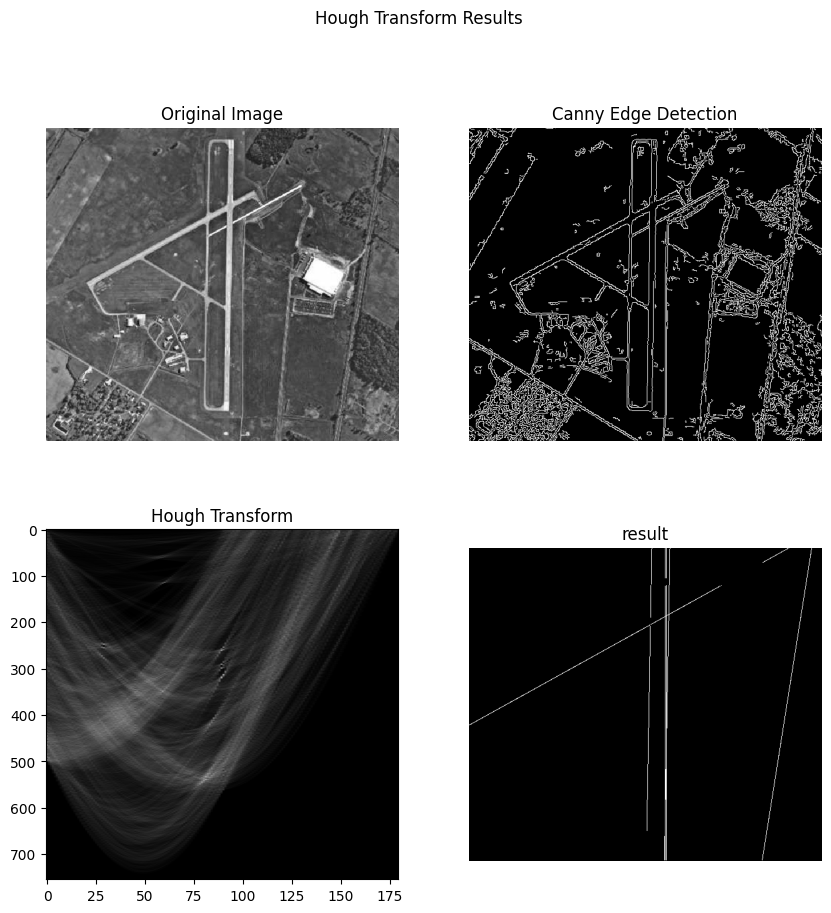

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from function import *

filename = "./test_images/Fig1034(a)(marion_airport).tif"
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)


# 使用 Canny 边缘检测
edges = cv2.Canny(img, 100, 200)  # 100 和 200 是低高阈值

hough = HoughTransform(edges,200,0,0)
# 显示霍夫矩阵并归一化
hough_normalized = cv2.normalize(hough, None, 0, 255, cv2.NORM_MINMAX)  # 归一化

result = drawLines_with_gap(edges,hough,200,50)
# plt 显示原图和边缘检测图像
figure, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].axis('off')
axes[0,0].set_title('Original Image')

axes[0,1].imshow(edges, cmap='gray')
axes[0,1].axis('off')
axes[0,1].set_title('Canny Edge Detection')


axes[1,0].imshow(hough_normalized, cmap='gray')
axes[1,0].set_aspect('auto')  # 设置坐标比例相等
axes[1,0].set_title('Hough Transform')

axes[1,1].imshow(result, cmap='gray',aspect='equal')
axes[1,1].axis('off')
axes[1,1].set_title('result')

plt.suptitle('Hough Transform Results ')
plt.savefig(f'./result/Hough_Transform_Results.jpg')
plt.show()


755


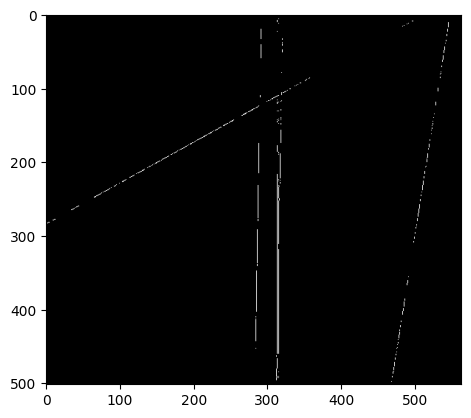

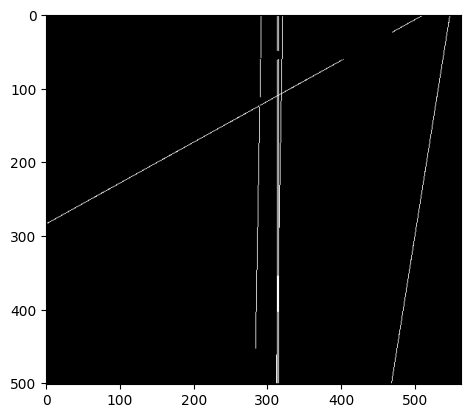

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from function import *

filename = "./test_images/Fig1034(a)(marion_airport).tif"
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)


# 使用 Canny 边缘检测
edges = cv2.Canny(img, 100, 200)  # 100 和 200 是低高阈值
hough = HoughTransform(edges,200,0,0)
line = drawLines(edges,hough,200)

line_with_gap_filled = drawLines_with_gap(edges,hough,200,50)


plt.imshow(line,cmap='gray')
plt.show()
plt.imshow(line_with_gap_filled,cmap='gray')
plt.show()


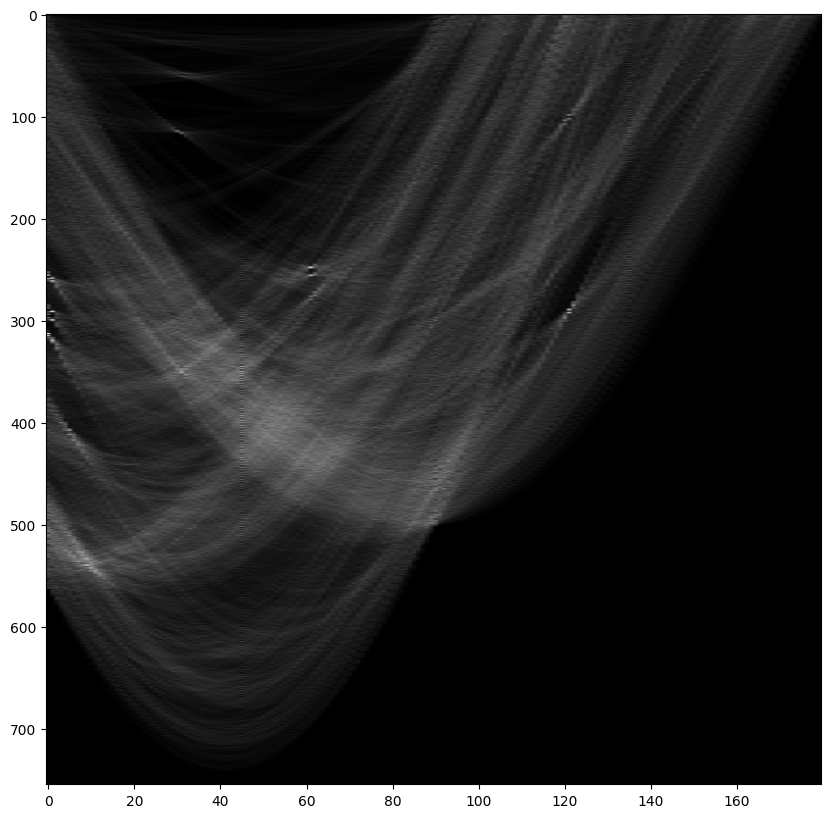

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 hough 是一个二维数组
# hough = ...

# 找到所有非零值的坐标
nonzero_indices = np.nonzero(edges)
nonzero_rows, nonzero_cols = nonzero_indices

hough_pic = np.zeros_like(hough)
# 创建一个图形
plt.figure(figsize=(10, 10))

# 遍历所有非零值的坐标
for row, col in zip(nonzero_rows, nonzero_cols):
    # 计算对应的 rho 和 theta 
    # 生成正弦曲线的点
    x = np.arange(180)
    y = (row * np.sin(np.deg2rad(x)) + col * np.cos(np.deg2rad(x))).astype(np.int64)

    valid_rho_indices = np.where((y >= 0) & (y <= hough.shape[0]-1))
    

    hough_pic[y[valid_rho_indices], x[valid_rho_indices]] +=  255
    # 绘制正弦曲线


# 显示结果
plt.imshow(hough_pic, cmap='gray',aspect='auto')
plt.show()





基本阈值： 139.96595612203788


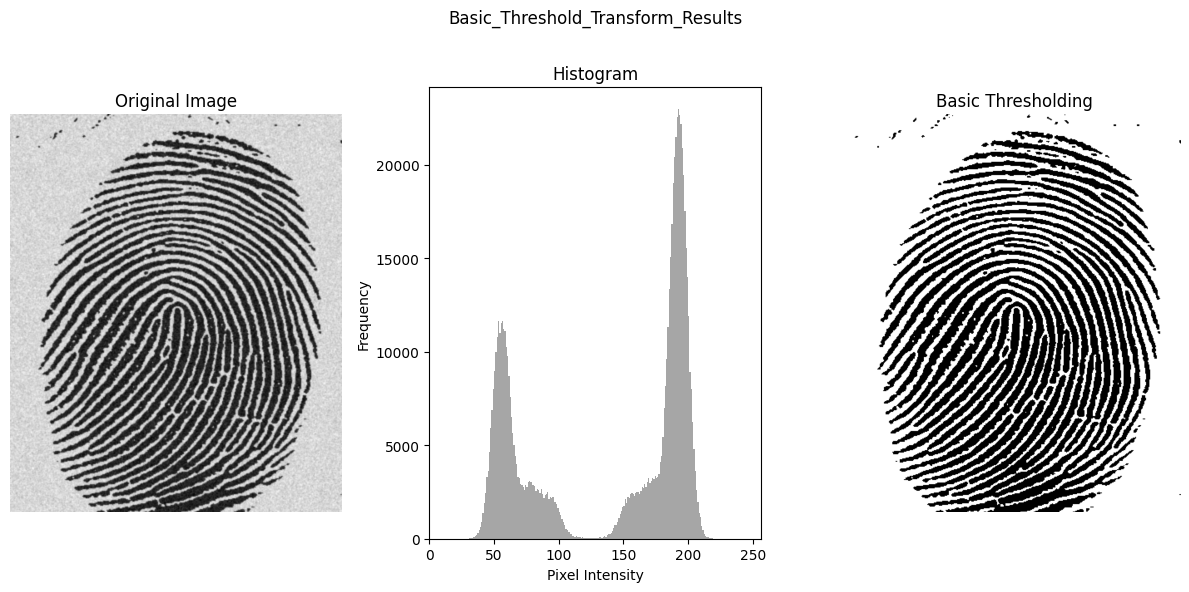

In [20]:
# 基本阈值处理

import cv2
import numpy as np
from function import *
import matplotlib.pyplot as plt

# 读取图像
filename = "./test_images/Fig1038(a)(noisy_fingerprint).tif"
img = cv2.imread(filename, 0)

# 进行基本阈值处理
result = basic_threshold(img, 30)

# 设置图像和直方图的显示
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# 显示原图像
axes[0].imshow(img, cmap='gray')
axes[0].axis('off')  # 关闭坐标轴
axes[0].set_title('Original Image')

# 显示原图像的直方图
axes[1].hist(img.flatten(), bins=256, range=[0, 256], color='gray', alpha=0.7)
axes[1].set_title('Histogram')
axes[1].set_xlim([0, 256])
axes[1].set_xlabel('Pixel Intensity')
axes[1].set_ylabel('Frequency')

axes[2].imshow(result, cmap='gray')
axes[2].axis('off')  # 关闭坐标轴
axes[2].set_title('Basic Thresholding')

plt.tight_layout()  # 调整子图间距
plt.suptitle(f'Basic_Threshold_Transform_Results')
plt.subplots_adjust(top=0.85)

plt.savefig(f'./result/Basic_Threshold_Transform_Results.jpg')

plt.show()




基本阈值： 169.6083434455348
169.6083434455348
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.09752361218450124, 0.45072464986602656, 0.7685156089860505, 1.1039459245187482, 1.3175251398389334, 1.5743248870934192, 1.8241709160838047, 2.206039596903929, 2.5435605210243937, 2.8715233995361444, 3.264390749130529, 3.6870646030930665, 4.057177186595903, 4.522845876620174, 5.059018023689752, 5.770329848262483, 6.40654439909184, 7.03957902673279, 7.668538872531163, 8.364675157187177, 8.975368117477249, 9.759117274268828, 10.84060648193794, 12.0454388688017, 13.322766455501398, 14.925268386651789, 16.22612473211444, 16.98967740889104, 17.60656292393386, 18.25800986128994, 19.018709397354854, 19.877616148132507, 20.732184085890538, 21.519912776806393, 22.102966047433345, 22.

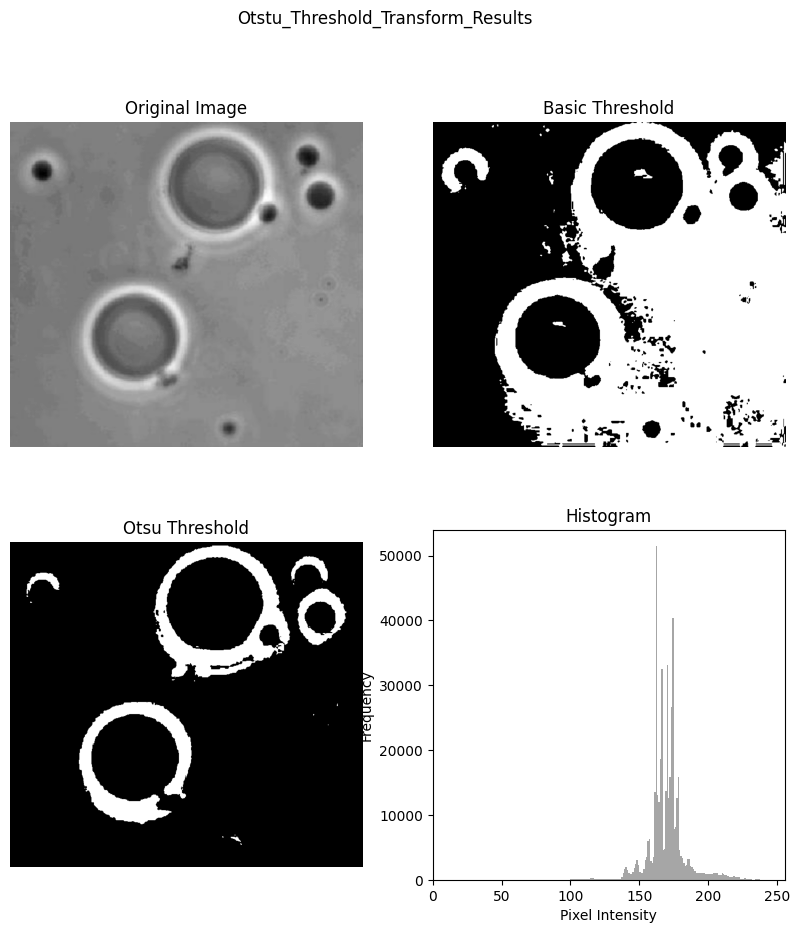

In [22]:
#Otsu阈值分割

import cv2
import numpy as np
from function import *
import matplotlib.pyplot as plt

# 读取图像
filename = "./test_images/Fig1039(a)(polymersomes).tif"
img = cv2.imread(filename, 0)

basic_result = basic_threshold(img,5)
Otus_result = Otus(img)

figure, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].axis('off')
axes[0,0].set_title('Original Image')

axes[0,1].imshow(basic_result, cmap='gray')
axes[0,1].axis('off')
axes[0,1].set_title('Basic Threshold')


axes[1,0].imshow(Otus_result, cmap='gray')
axes[1,0].axis('off')
axes[1,0].set_title('Otsu Threshold')

# 更新为显示灰度直方图
axes[1, 1].cla()  # 清除现有轴
axes[1, 1].hist(img.flatten(), bins=256, range=[0, 256], color='gray', alpha=0.7)  # 绘制直方图
axes[1, 1].set_title('Histogram')
axes[1, 1].set_xlim([0, 256])
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.suptitle(f'Otstu_Threshold_Transform_Results')
plt.savefig(f'./result/Ostu_Threshold_Transform_Results.jpg')

plt.show()

25.77403349418109
[0, 0, 0, 0, 0, 0, 0, 0.008879279702723775, 0.02887448219594617, 0.08978089973481015, 0.2781362767597977, 0.7704423676799663, 1.8720562167528498, 4.011842605744944, 7.571305214361366, 13.159306735286302, 20.740155361033068, 30.00579637909687, 40.91666071322294, 53.13506056489013, 66.45567350333187, 80.44684484547571, 95.74679830582163, 111.04708881510328, 126.1288994221668, 140.4387198603306, 153.24092782403855, 163.6863676744069, 171.56955934848835, 177.36206947808782, 180.9940088688363, 182.88128906066655, 183.92985493188107, 184.49127359822614, 184.77974070874478, 184.87469747308336, 184.90665049837264, 184.91856572445894, 184.9200914219931, 184.9200914219931, 184.9200914219931, 184.9200914219931, 184.91721590803675, 184.8987717458247, 184.83128018019923, 184.67211342630918, 184.28759484298797, 183.468093002714, 181.81685136720046, 178.83921485875672, 174.45475175199695, 167.92200404686966, 158.43341051805623, 147.00781810601367, 133.34841725732474, 118.14799334240

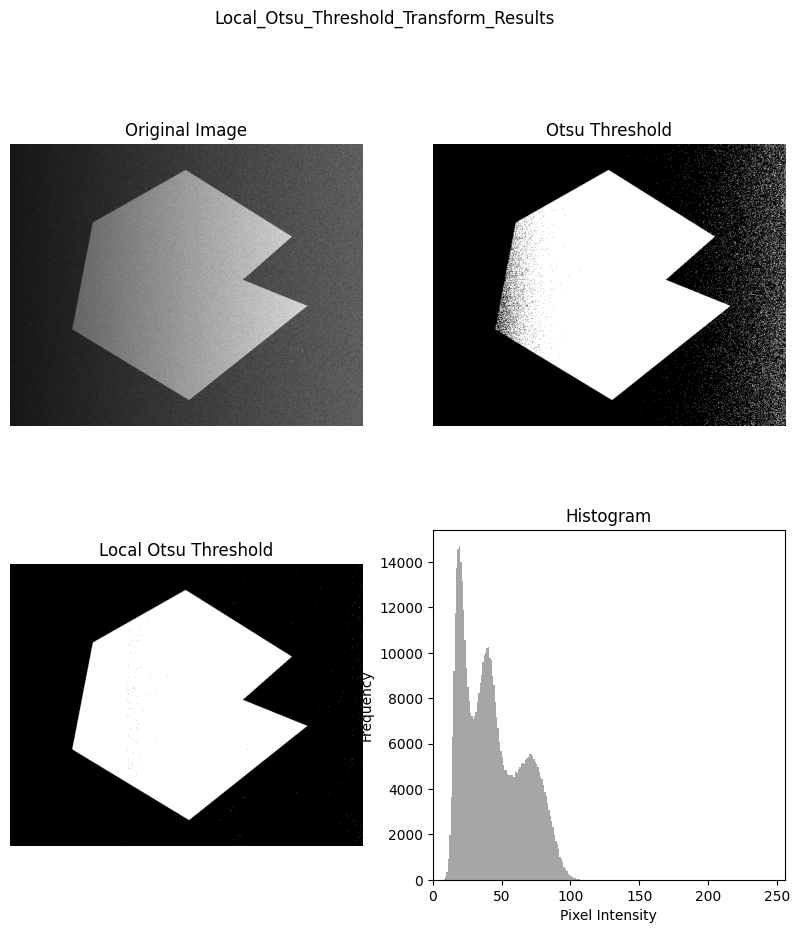

In [23]:
#分块可变阈值分割

import cv2
import numpy as np
from function import *
import matplotlib.pyplot as plt

# 读取图像
filename = "./test_images/Fig1046(a)(septagon_noisy_shaded).tif"
img = cv2.imread(filename, 0)

# 
def local_threshold(img, block_size:tuple):
    """
    局部阈值分割
    block_size: 块数量(宽分割数量，高分割数量)
    """
    height, width = img.shape
    block_height = height // block_size[1]
    block_width = width // block_size[0]
    result = np.zeros((height, width), dtype=np.uint8)
    for i in range(block_size[1]):
        for j in range(block_size[0]):
            block = img[i*block_height:(i+1)*block_height, j*block_width:(j+1)*block_width]
            block_result = Otus(block)
            result[i*block_height:(i+1)*block_height, j*block_width:(j+1)*block_width] = block_result
    return result

local_result = local_threshold(img, (3, 2))
Otus_result = Otus(img)

figure, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].axis('off')
axes[0,0].set_title('Original Image')

axes[0,1].imshow(Otus_result, cmap='gray')
axes[0,1].axis('off')
axes[0,1].set_title('Otsu Threshold')


axes[1,0].imshow(local_result, cmap='gray')
axes[1,0].axis('off')
axes[1,0].set_title('Local Otsu Threshold')

# 更新为显示灰度直方图
axes[1, 1].cla()  # 清除现有轴
axes[1, 1].hist(img.flatten(), bins=256, range=[0, 256], color='gray', alpha=0.7)  # 绘制直方图
axes[1, 1].set_title('Histogram')
axes[1, 1].set_xlim([0, 256])
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.suptitle(f'Local_Otsu_Threshold_Transform_Results')
plt.savefig(f'./result/Local_Otsu_Threshold_Transform_Results.jpg')
plt.show()